In [1]:
##scale storage and processus with all core in machine
#scaling Pandas dataframes to  larger datasets dont fit in memory and multiples process with different nodes

In [5]:
from dask.distributed import Client

In [9]:
client=Client(n_workers=2, threads_per_worker=1,memory_limit='1GB')
client

C:\Users\alish\anaconda3\envs\dask-tutorial\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 58664 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:58664/status,
Dashboard: http://127.0.0.1:58664/status,Workers: 2
Total threads: 2,Total memory: 1.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:58665,Workers: 2
Dashboard: http://127.0.0.1:58664/status,Total threads: 2
Started: Just now,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:58682,Total threads: 1
Dashboard: http://127.0.0.1:58683/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:58668,


## dataframe

In [10]:
import dask.dataframe as dd

In [13]:
ddf = dd.read_csv('data/beer_small.csv', blocksize='12e6')
ddf

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
npartitions=1,,,,,,,,,,,,,,
,int64,int64,object,int64,float64,float64,float64,object,object,float64,float64,object,float64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [17]:
ddf.map_partitions(type).compute()##run function on each partition

0    <class 'pandas.core.frame.DataFrame'>
dtype: object

In [18]:
ddf.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,784200,952,Great Dane Pub & Brewing Company (Downtown),1136269921,4.5,4.0,4.0,dirtylou,American IPA,4.0,4.0,Texas Speedbump IPA,NaN,11846
1,1305265,29,Anheuser-Busch,1234830966,4.5,4.0,3.0,talkinghatrack,Light Lager,3.0,4.0,Bud Light Lime,4.2,41821
2,1526298,45,Brooklyn Brewery,1078599557,4.5,4.0,4.0,PopeJonPaul,Scotch Ale / Wee Heavy,4.0,4.5,Brooklyn Heavy Scotch Ale,7.5,16355
3,450647,590,New Glarus Brewing Company,1288790879,4.5,4.5,4.5,sweemzander,American Wild Ale,4.5,4.0,R&D Bourbon Barrel Kriek,5.5,60588
4,1223094,4,Allagash Brewing Company,1295320417,4.5,4.5,4.0,Jmoore50,American Wild Ale,4.0,4.0,Allagash Victor Francenstein,9.7,56665


In [22]:
ddf[ddf['beer_style'].str.contains('IPA')].head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,784200,952,Great Dane Pub & Brewing Company (Downtown),1136269921,4.5,4.0,4.0,dirtylou,American IPA,4.0,4.0,Texas Speedbump IPA,NaN,11846
9,426580,666,Emerson's Brewery,1192461083,5.0,4.0,4.5,Lukie,English India Pale Ale (IPA),4.0,5.0,1812 India Pale Ale,4.7,4594
24,728901,17963,Nectar Ales,1312873910,3.5,4.0,3.5,Sensaray,American IPA,3.5,3.5,IPA Nectar,6.8,9024
26,745463,12877,NINE G Brewing Company,1189556274,4.0,4.5,4.0,Phatz,American Double / Imperial IPA,4.0,4.5,Infidel Imperial IPA,8.4,31041
28,94239,140,Sierra Nevada Brewing Co.,1269655771,4.0,4.5,4.5,CaptainIPA,American IPA,4.5,4.5,Sierra Nevada Torpedo Extra IPA,7.2,30420


In [20]:
ddf['beer_style'].mode().compute()

0    American IPA
Name: beer_style, dtype: object

In [23]:
ipa=ddf[ddf['beer_style'].str.contains('IPA')]

In [24]:
ddf.columns

Index(['Unnamed: 0', 'brewery_id', 'brewery_name', 'review_time',
       'review_overall', 'review_aroma', 'review_appearance',
       'review_profilename', 'beer_style', 'review_palate', 'review_taste',
       'beer_name', 'beer_abv', 'beer_beerid'],
      dtype='object')

In [26]:
mean_ipa_review=ipa.groupby('brewery_name')['review_overall'].agg(['mean','count'])##apply different agg function like pivot table in pandas

In [27]:
mean_ipa_review.compute()

,mean,count
brewery_name,,
Great Dane Pub & Brewing Company (Downtown),3.900000,5
Emerson's Brewery,4.500000,5
Nectar Ales,3.924242,33
NINE G Brewing Company,4.250000,2
Sierra Nevada Brewing Co.,4.103636,1100
...,...,...
Rocky Mountain Brewing,3.000000,1
Kirkwood Station Brewing Company,3.000000,1
The Farmers' Cabinet,4.500000,1


In [28]:
mean_ipa_review.nlargest(20,'mean').compute()##return 20 largest mean

,mean,count
brewery_name,,
Elk Mountain Brewing,5.000000,1
Pioneer Brewing Co.,5.000000,2
Burnside Brewing Co.,5.000000,1
La Jolla Brew House,5.000000,1
Uncle Buck's Brewery & Steakhouse,5.000000,1
Feral Brewing Co.,5.000000,1
Flour City Brewing Co.,5.000000,1
Crouch Vale Brewery Limited,5.000000,1
Glacier Brewhouse,4.875000,4


In [29]:
mean_ipa_review.to_csv('ipa.csv')##save to csv

['C:\\Users\\alish\\dask-tutorial\\ipa.csv\\0.part']

In [31]:
client.close()

2022-09-09 23:58:57,598 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:58567', name: 1, status: running, memory: 0, processing: 0>
2022-09-09 23:58:57,599 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:58601', name: 0, status: running, memory: 0, processing: 0>
2022-09-09 23:58:57,600 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:58530', name: 1, status: running, memory: 0, processing: 0>
2022-09-09 23:58:57,603 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:58567'.
2022-09-09 23:58:57,605 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:58601'.
2022-09-09 23:58:57,607 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:585

## lab

In [32]:
from dask.distributed import Client
client=Client(n_workers=2,threads_per_worker=1,memory_limit='1GB')
client

C:\Users\alish\anaconda3\envs\dask-tutorial\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 60345 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:60345/status,
Dashboard: http://127.0.0.1:60345/status,Workers: 2
Total threads: 2,Total memory: 1.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:60346,Workers: 2
Dashboard: http://127.0.0.1:60345/status,Total threads: 2
Started: Just now,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:60363,Total threads: 1
Dashboard: http://127.0.0.1:60364/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:60350,


In [34]:
import dask.dataframe as dd

In [35]:
ddf=dd.read_csv('data/pageviews_small.csv',sep=' ',blocksize=10e6)
ddf

,en.m,Article_51,1,0
npartitions=3,,,,
,object,object,int64,int64
,...,...,...,...
,...,...,...,...
,...,...,...,...


In [36]:
ddf.columns

Index(['en.m', 'Article_51', '1', '0'], dtype='object')

In [37]:
ddf.columns=['project','page','requests','x']#chnger les noms de columns

In [38]:
ddf.columns

Index(['project', 'page', 'requests', 'x'], dtype='object')

In [39]:
ddf2=ddf.drop('x',axis=1)

In [40]:
ddf2.head()

,project,page,requests
0,ja,エレファモン,1
1,ang,Flocc:Scīrung,1
2,en,Panorama_(La_Dispute_album),1
3,fa.m,جاشوا_جکسون,1
4,fa.m,خانواده_کندی,2


In [44]:
ddf_en=ddf[ddf['project']=='en'] #filtrer seul les projet en en

In [45]:
ddf_en.head()

,project,page,requests,x
2,en,Panorama_(La_Dispute_album),1,0
9,en,Operating_cost,4,0
19,en,Richard_Barlow_(Intelligence_analyst),1,0
27,en,St_Vincent_and_the_Grenadines,1,0
28,en,Ian_McKee,1,0


In [46]:
ddf2.count().compute()

project     1118999
page        1118988
requests    1118999
dtype: int64

In [47]:
ddf_en.count().compute()

project     196882
page        196881
requests    196882
x           196882
dtype: int64

In [50]:
ddf4=ddf2.groupby('project').count().reset_index()##reset_index is to return int index in place of project as index

In [51]:
ddf4.head()

,project,page,requests
0,aa,6,6
1,aa.d,5,5
2,aa.m.b,1,1
3,ab,24,24
4,ab.m,1,1


In [59]:
ddf4[ddf4['project'].isin(['en','fr','zh','pl'])].compute()##return rows or project when name in list 

,project,page,requests
237,en,196881,196882
316,fr,33915,33915
763,pl,11931,11931
1110,zh,17577,17577


In [60]:
client.close()

## dask gui

In [61]:
from dask.distributed import Client
client=Client(n_workers=2,threads_per_worker=1,memory_limit='1GB')
client

C:\Users\alish\anaconda3\envs\dask-tutorial\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 61075 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:61075/status,
Dashboard: http://127.0.0.1:61075/status,Workers: 2
Total threads: 2,Total memory: 1.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:61076,Workers: 2
Dashboard: http://127.0.0.1:61075/status,Total threads: 2
Started: Just now,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:61097,Total threads: 1
Dashboard: http://127.0.0.1:61099/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:61080,


In [74]:
client.cluster.scale(2)

In [68]:
import dask.dataframe as dd

In [69]:
ddf=dd.read_csv('data/pageviews_small.csv',sep=' ',blocksize=10e6)
ddf

,en.m,Article_51,1,0
npartitions=3,,,,
,object,object,int64,int64
,...,...,...,...
,...,...,...,...
,...,...,...,...


In [70]:
ddf.columns=['project','page','requests','x']

In [71]:
ddf2=ddf.drop('x',axis=1)

In [72]:
ddf_en=ddf[ddf['project']=='en'] 
ddf_en

,project,page,requests,x
npartitions=3,,,,
,object,object,int64,int64
,...,...,...,...
,...,...,...,...
,...,...,...,...


In [75]:
client.close()

## dask array

In [76]:
from dask.distributed import Client
client=Client(n_workers=2,threads_per_worker=1,memory_limit='1GB')
client

C:\Users\alish\anaconda3\envs\dask-tutorial\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 61778 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:61778/status,
Dashboard: http://127.0.0.1:61778/status,Workers: 2
Total threads: 2,Total memory: 1.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:61779,Workers: 2
Dashboard: http://127.0.0.1:61778/status,Total threads: 2
Started: Just now,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:61798,Total threads: 1
Dashboard: http://127.0.0.1:61799/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:61783,


In [77]:
import numpy as np
import dask.array as da

In [78]:
arr=np.arange(1,50,3)
arr

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])

In [80]:
arr_da=da.arange(1,50,3,chunks=5)
arr_da


dask.array<arange, shape=(17,), dtype=int32, chunksize=(5,), chunktype=numpy.ndarray>

In [82]:
print(arr_da.dtype)
print(arr_da.shape)

int32
(17,)


In [83]:
arr_da.chunks #4 chunks

((5, 5, 5, 2),)

In [84]:
arr_da.chunksize #1chunks -->5 element

(5,)

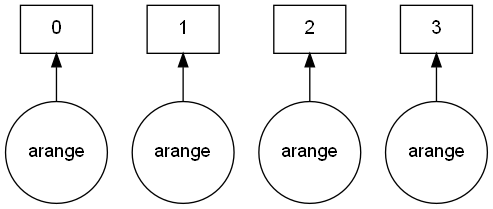

In [85]:
arr_da.visualize()

In [87]:
(arr_da==2).compute()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

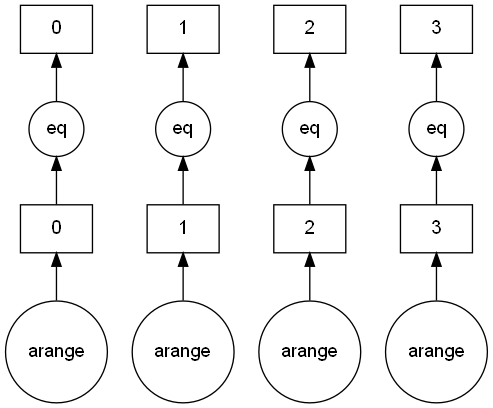

In [88]:
(arr_da==2).visualize()

In [89]:
type((arr_da==2).compute())

numpy.ndarray

In [ ]:
##dask array working and coputing with data in block large then memory to store data computing on //

In [91]:
x=da.random.random(20,chunks=5)
x

dask.array<random_sample, shape=(20,), dtype=float64, chunksize=(5,), chunktype=numpy.ndarray>

In [92]:
res=x.sum()
res

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

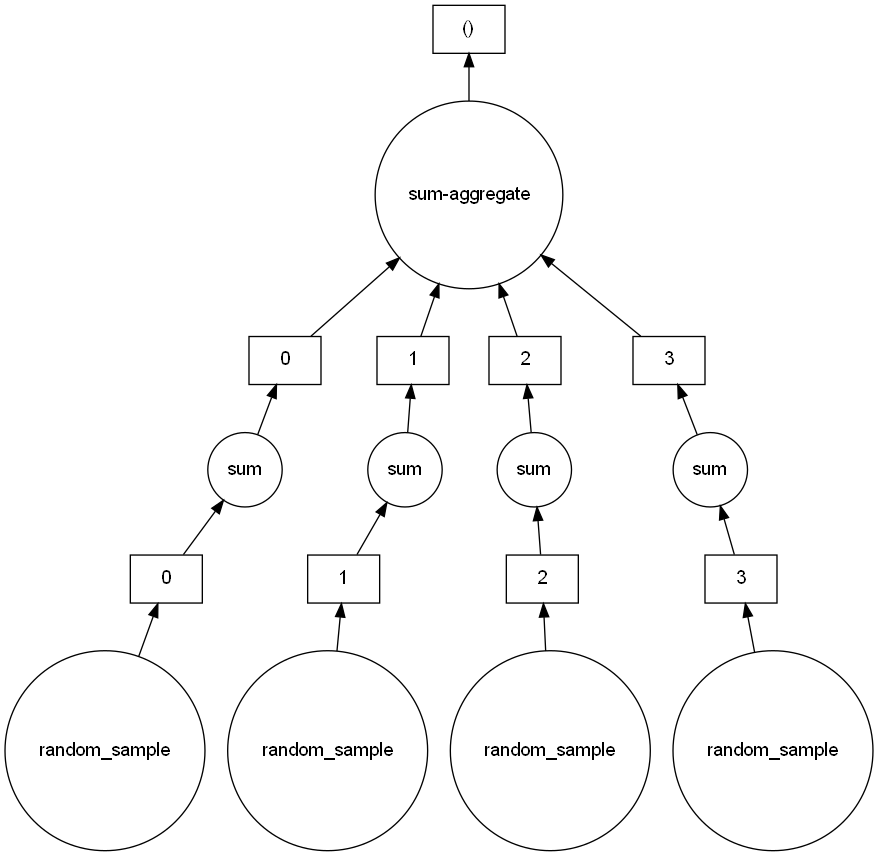

In [93]:
res.visualize()

In [94]:
res.compute()

9.214994099935115

In [95]:
x=da.random.random(size=(15,15),chunks=(10,5))
x

dask.array<random_sample, shape=(15, 15), dtype=float64, chunksize=(10, 5), chunktype=numpy.ndarray>

In [97]:
res=(x+x.T).sum()
res

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

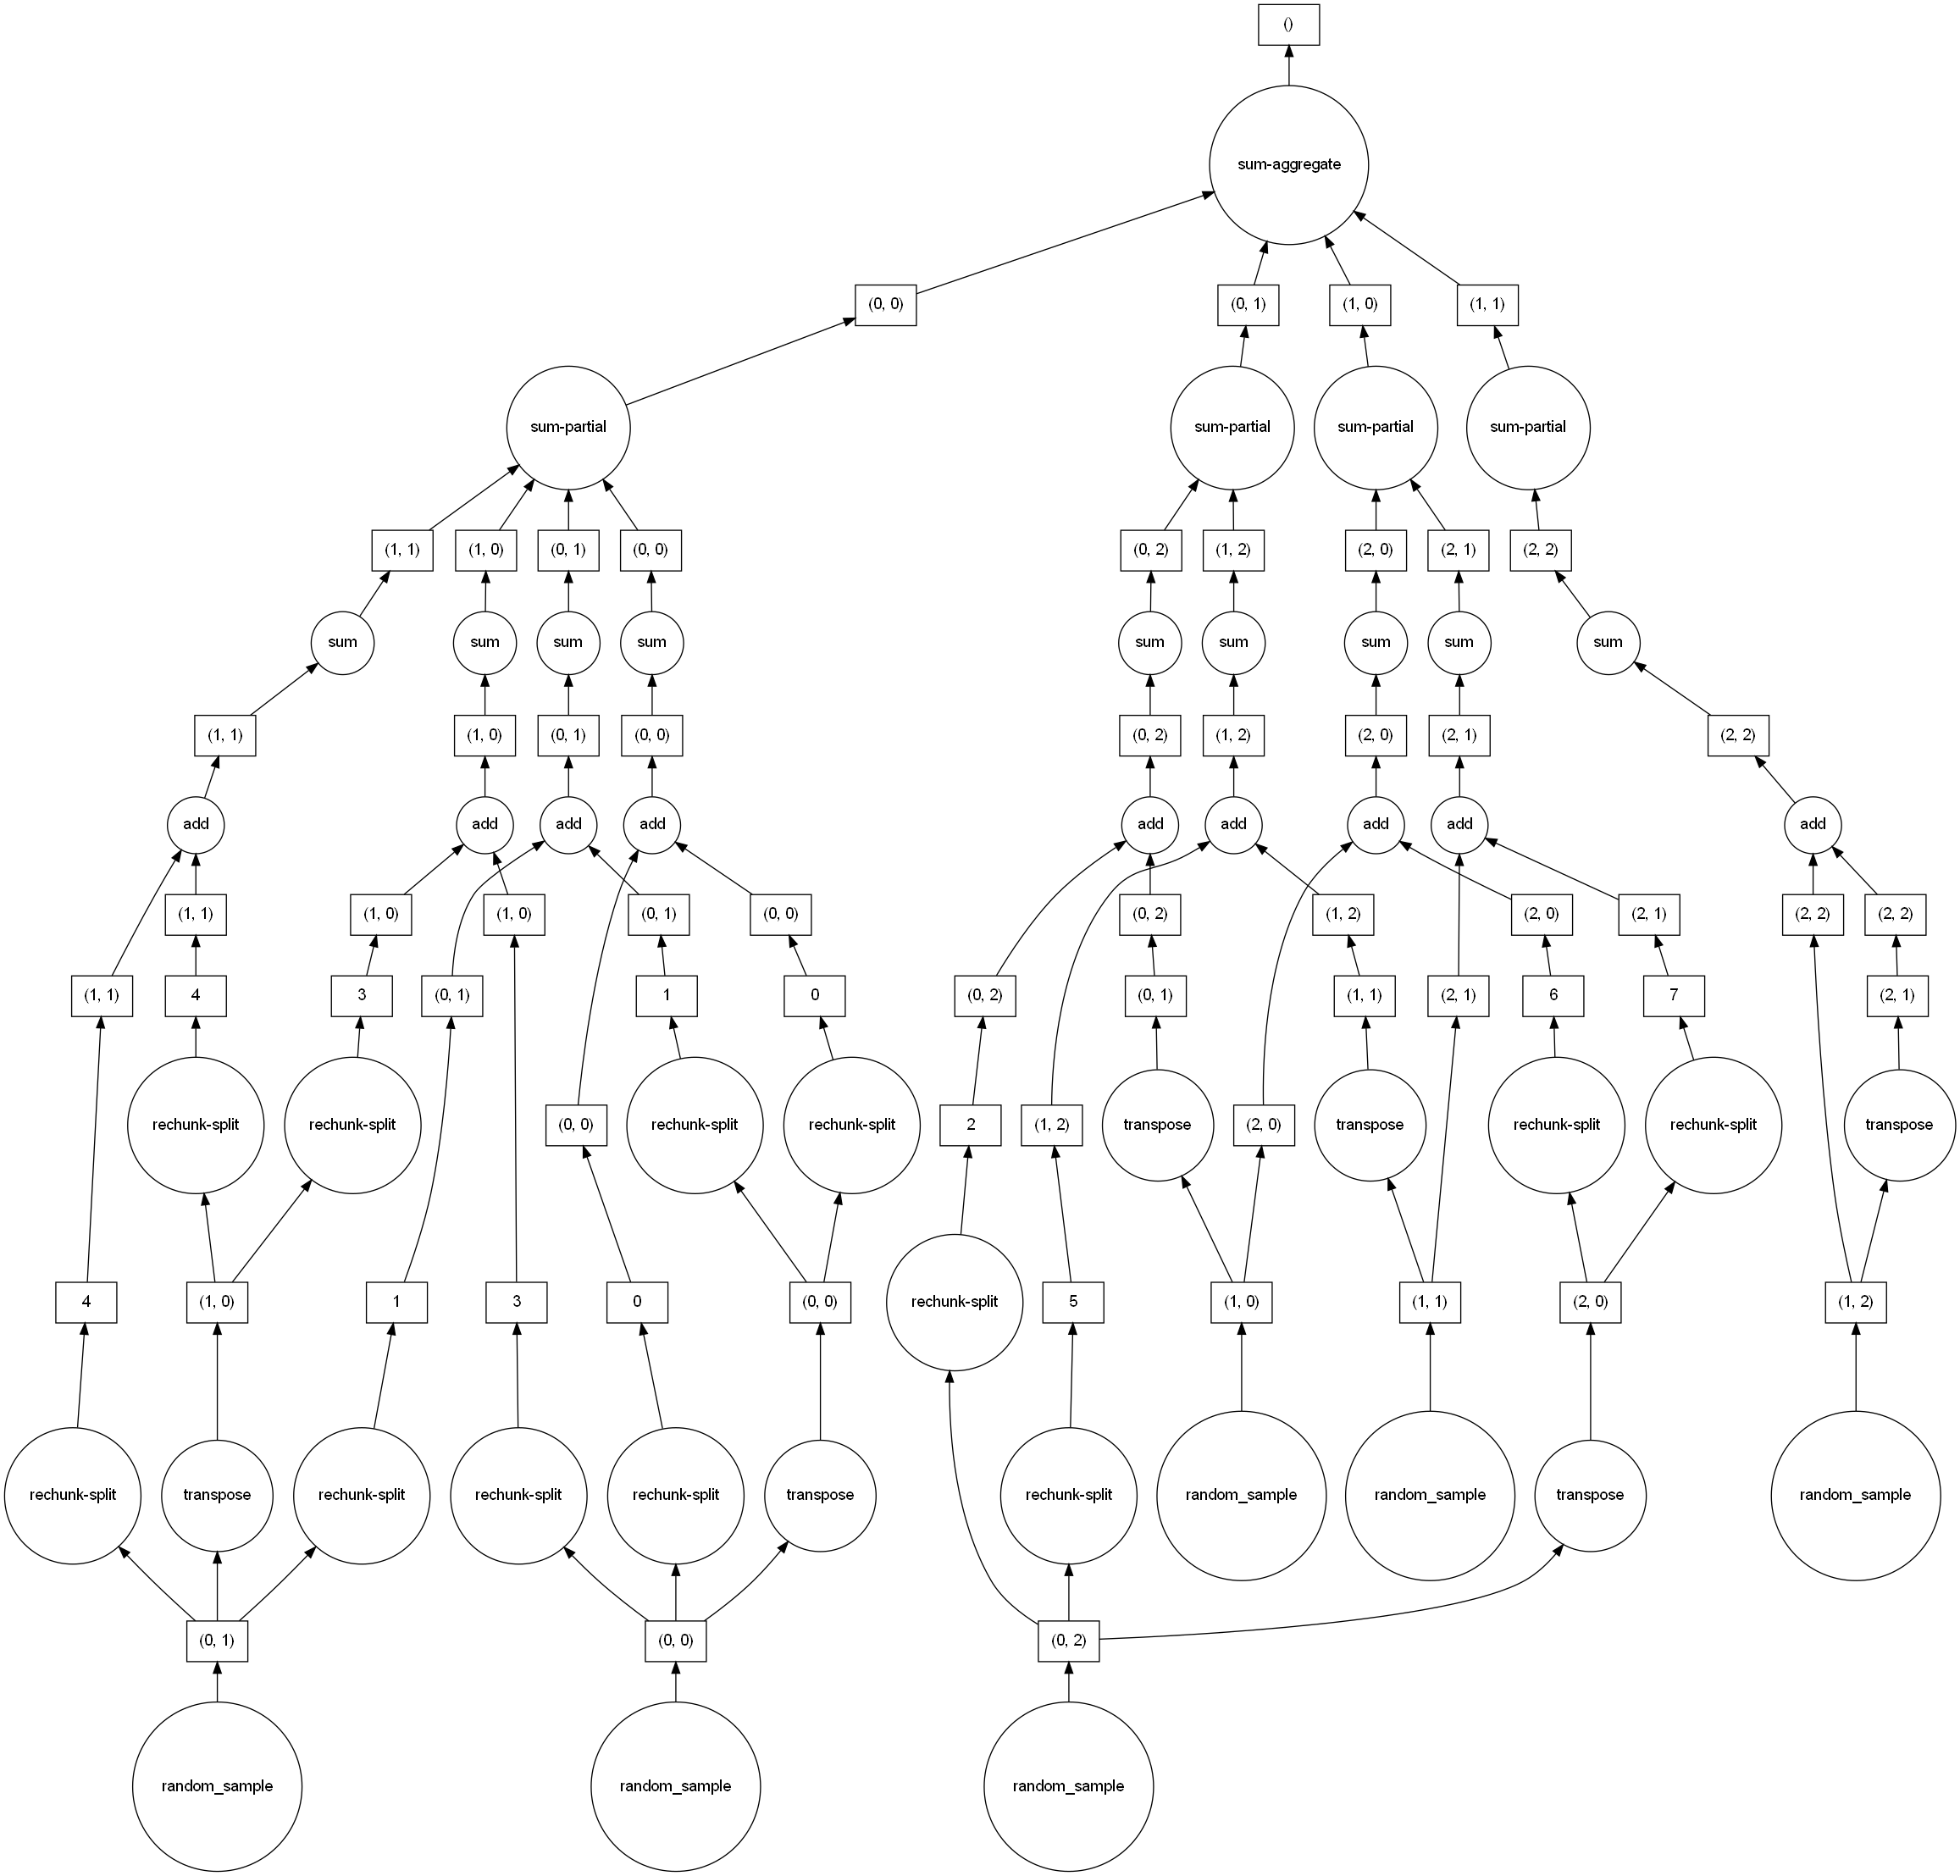

In [98]:
res.visualize()##task process

In [99]:
res.compute()

230.15567503595574

In [100]:
x=da.random.random(size=(20000,20000),chunks=(2000,2000))
x

dask.array<random_sample, shape=(20000, 20000), dtype=float64, chunksize=(2000, 2000), chunktype=numpy.ndarray>

In [101]:
res=(x+x.T).sum()
res

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

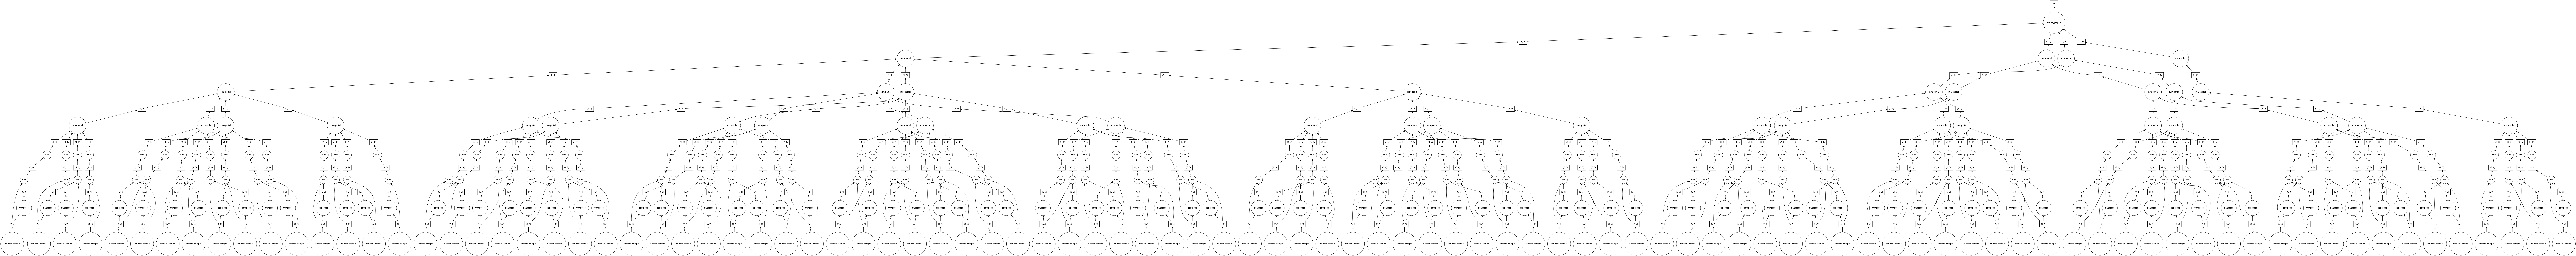

In [102]:
res.visualize()

In [103]:
res.compute()

399998260.45956516

In [104]:
client.close()

## dask ml

In [213]:
from dask.distributed import Client
client=Client(n_workers=2,threads_per_worker=1,memory_limit='1GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 1.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:58949,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:58969,Total threads: 1
Dashboard: http://127.0.0.1:58970/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:58953,


In [214]:
import dask.dataframe as dd
ddf=dd.read_csv('data/diamonds.csv',dtype={'carat': 'float64', 'cut': 'object', 'color': 'object','clarity': 'object','depth': 'float64','table': 'float64','price': 'int64','x':'float64','y':'float64','z':'float64'},blocksize=1e6)
ddf

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
npartitions=3,,,,,,,,,,,
,int64,float64,object,object,object,float64,float64,int64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


In [215]:
ddf=ddf.drop(['Unnamed: 0'],axis=1)

In [216]:
ddf

,carat,cut,color,clarity,depth,table,price,x,y,z
npartitions=3,,,,,,,,,,
,float64,object,object,object,float64,float64,int64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...


In [217]:
ddf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [218]:
ddf=ddf.categorize()##dont know
ddf

,carat,cut,color,clarity,depth,table,price,x,y,z
npartitions=3,,,,,,,,,,
,float64,category[known],category[known],category[known],float64,float64,int64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...


In [219]:
ddf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [220]:
ddf_normalized=dd.reshape.get_dummies(ddf)

In [221]:
ddf_normalized

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
npartitions=3,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,int64,float64,float64,float64,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [222]:
ddf_normalized.head()#onehot encoding same 

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [223]:
from sklearn.pipeline import make_pipeline
from dask_ml.linear_model import LinearRegression
from dask_ml.preprocessing import Categorizer,DummyEncoder,StandardScaler##dummy encoder is give 2 column bot 0 and 1 and with combinaison od it we get class encode

In [224]:
pipe=make_pipeline(##make pipe to automate preprocessing + train 
    Categorizer(),
    DummyEncoder(),
    StandardScaler()
    
)
data_norm=pipe.fit_transform(ddf)##fit +transorm data




In [225]:
data_norm.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129,-0.175403,-0.316312,1.225928,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
1,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175,-0.175403,-0.316312,-0.815708,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
2,-1.198168,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175,-0.175403,3.161440,-0.815708,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,-0.453289,2.366727,-0.542295,-0.269603,-0.321954
3,-1.071587,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720,-0.175403,-0.316312,-0.815708,...,2.991381,-0.234343,-0.11802,-0.185268,-0.565361,-0.453289,-0.422524,1.844015,-0.269603,-0.321954
4,-1.029394,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674,-0.175403,3.161440,-0.815708,...,-0.334294,4.267248,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954


In [226]:
y=data_norm['price'].to_dask_array(lengths=True)
y

dask.array<values, shape=(53940,), dtype=float64, chunksize=(18121,), chunktype=numpy.ndarray>

In [227]:
x=data_norm.drop('price',axis=1).to_dask_array(lengths=True)
x

dask.array<values, shape=(53940, 26), dtype=float64, chunksize=(18121, 26), chunktype=numpy.ndarray>

In [228]:
from dask_ml.model_selection import train_test_split

In [229]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [230]:
X_train.compute().shape

(43151, 26)

In [115]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)


In [116]:
y_test_pred=model.predict(X_test)##other daata to test w need transform with standerscaler
y_train_pred=model.predict(X_train)

In [117]:
model.coef_

array([ 0.71118839,  0.00119003, -0.00489087,  0.08417773,  0.02500916,
        0.00914   , -0.02661512, -0.00624277,  0.01065222,  0.00179251,
        0.00093346,  0.04378557,  0.0344828 ,  0.02657252,  0.00737138,
       -0.02470381, -0.05076004, -0.07672897, -0.10556935,  0.04587376,
       -0.02448855, -0.09008653,  0.03641505,  0.02268778,  0.04793827,
        0.04726158])

In [118]:
from sklearn.metrics import mean_squared_error as mse

In [119]:
score_test=mse(y_test_pred,y_test)
score_train=mse(y_train_pred,y_train)

In [120]:
print('score train = ',score_train)
print('score test = ',score_test)

score train =  0.13459831295416277
score test =  0.13622534886833482


In [121]:

import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 26 artists>

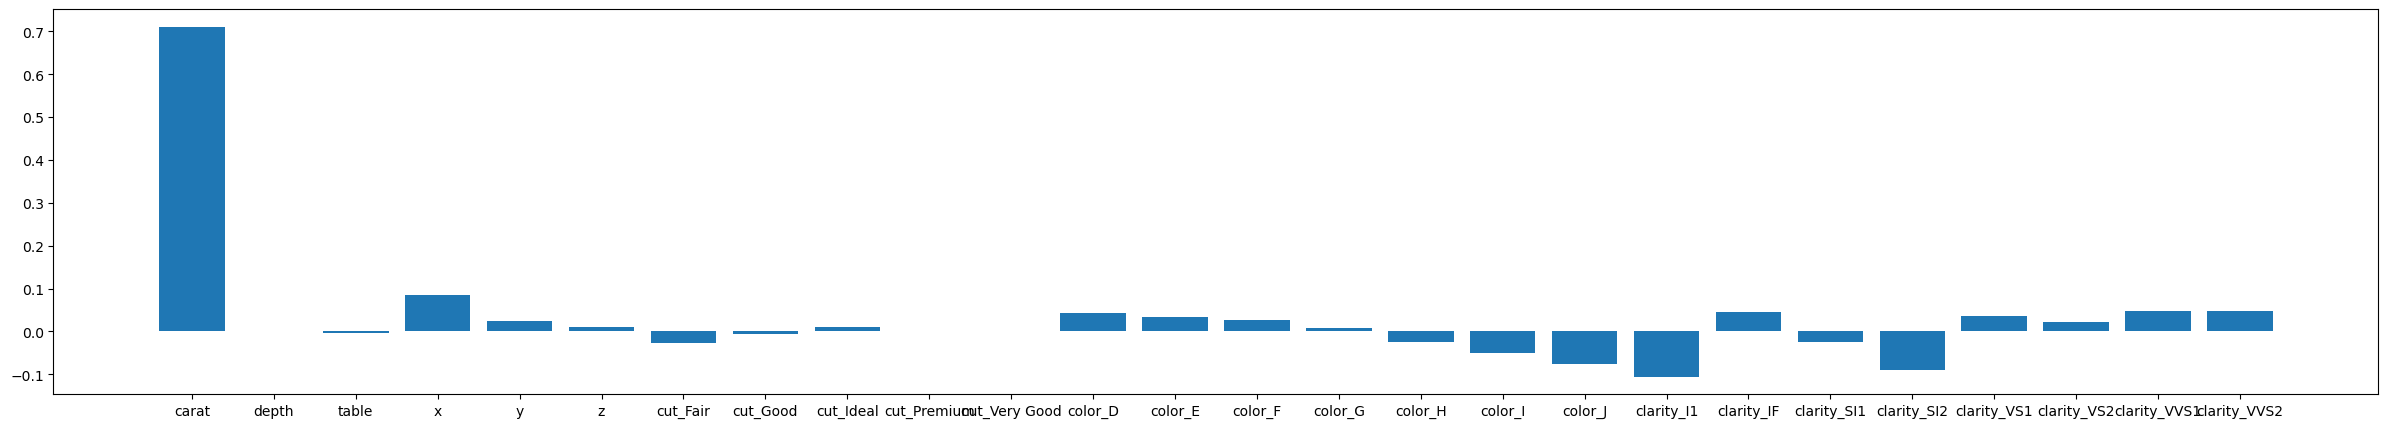

In [122]:
plt.figure(figsize=(30,5))
plt.bar(data_norm.columns.drop('price'),model.coef_)

In [188]:
cols=data_norm.columns.drop('price')
cols_high_corr=[]


In [158]:
##we can use cross validation and draw error with treeshold to get best treshold corr (when no overfit high variance   or underfit high bias between the train and validation are so close )
for col in cols:
    if(abs(data_norm[col].corr(data_norm['price']).compute())>0.03):
        cols_high_corr.append(col)

c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assumi

In [159]:
cols_high_corr

['carat',
 'table',
 'x',
 'y',
 'z',
 'cut_Ideal',
 'cut_Premium',
 'color_D',
 'color_E',
 'color_H',
 'color_I',
 'color_J',
 'clarity_IF',
 'clarity_SI2',
 'clarity_VVS1',
 'clarity_VVS2']

In [160]:
x=data_norm.drop('price',axis=1)[cols_high_corr].to_dask_array(lengths=True)
x

dask.array<values, shape=(53940, 16), dtype=float64, chunksize=(18121, 16), chunktype=numpy.ndarray>

In [161]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [162]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)

In [163]:
y_test_pred=model.predict(X_test)##other daata to test w need transform with standerscaler
y_train_pred=model.predict(X_train)

In [164]:
model.coef_

array([ 0.47128572, -0.00960383,  0.21172316,  0.07265046,  0.00464762,
        0.01596481,  0.00788436,  0.02263939,  0.01376366, -0.03891774,
       -0.0568109 , -0.07688142,  0.03920521, -0.08287956,  0.04029864,
        0.0389236 ])

In [165]:
score_test=mse(y_test_pred,y_test)
score_train=mse(y_train_pred,y_train)
print('score train = ',score_train)
print('score test = ',score_test)

score train =  0.18554063252178973
score test =  0.18828586196268932


In [231]:
import numpy as np
cols=data_norm.columns.drop('price')
cols_high_corr=[]
tresh=np.arange(0,0.7,0.1)
err_train=[]
err_test=[]

In [ ]:
for tr in np.round(tresh,2):
    for col in cols:
        if(abs(data_norm[col].corr(data_norm['price']).compute())>tr):
            cols_high_corr.append(col)
    x=data_norm.drop('price',axis=1)[cols_high_corr].to_dask_array(lengths=True)
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
    lr=LinearRegression()
    scr=cross_val_score(lr, X_train, y_train, cv=5)
    model=lr.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)##other daata to test w need transform with standerscaler outside our data to test
    y_train_pred=model.predict(X_train)
    score_test=mse(y_test_pred,y_test)
    score_train=mse(y_train_pred,y_train)
    err_train.append(score_train)
    err_test.append(score_test)
  

c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assumi

c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assumi

c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assumi

c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assumi

c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(
c:\dask\dask\dataframe\multi.py:1260: UserWarning: Concatenating dataframes with unknown divisions.
We're assumi

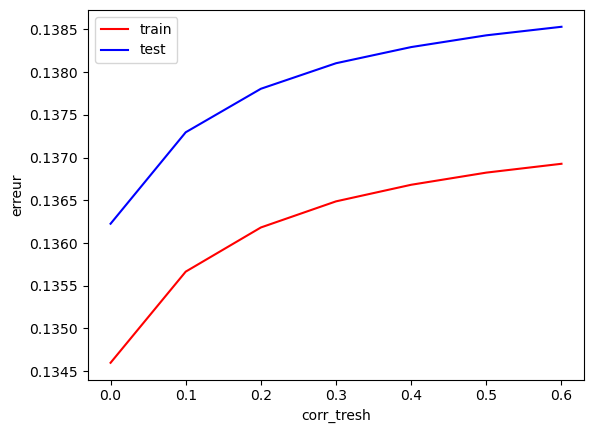

In [187]:
plt.plot(tresh,err_train,color='red',label='train')
plt.plot(tresh,err_test,color='blue',label='test')
plt.xlabel('corr_tresh')
plt.ylabel('erreur')
plt.legend()

In [ ]:
#bad curve ##cross val for each treshold 

## lab

In [193]:
ddf=dd.read_csv('data/powerplant.csv',sample=512000,blocksize=4e4) #block size numbre of data frame block
ddf

,AT,V,AP,RH,PE
npartitions=7,,,,,
,float64,float64,float64,float64,float64
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [196]:
ddf.describe().compute()

,AT,V,AP,RH,PE
count,66976.000000,66976.000000,66976.000000,66976.000000,66976.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452139,12.707324,5.938518,14.599615,17.066231
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [199]:
ddf_cp=pipe.fit_transform(ddf)

In [200]:
x=ddf_cp.drop('PE',axis=1).to_dask_array(lengths=True)
y=ddf_cp['PE'].to_dask_array(lengths=True)

In [201]:
 X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [202]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)

In [203]:
y_test_pred=model.predict(X_test)##other daata to test w need transform with standerscaler outside our data to test
y_train_pred=model.predict(X_train)
score_test=mse(y_test_pred,y_test)
score_train=mse(y_train_pred,y_train)

In [204]:
print('score train = ',score_train)
print('score test = ',score_test)

score train =  0.07150520555997245
score test =  0.07050424635512846


In [206]:
y_test_pred.max().compute()-y_train_pred.min().compute()

4.247112199217094

In [209]:
client.close()

## bag 

In [1]:
from dask.distributed import Client
client=Client(n_workers=2,threads_per_worker=1,memory_limit='1GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 1.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:61007,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:61020,Total threads: 1
Dashboard: http://127.0.0.1:61021/status,Memory: 0.93 GiB
Nanny: tcp://127.0.0.1:61011,


In [2]:
import dask.bag as db##bag is can contain duplicated item ,no indexing (set eliminate duplicate ,no inedx)
b=db.from_sequence(range(50),npartitions=4)
b

dask.bag<from_sequence, npartitions=4>

In [3]:
b.count().compute()

50

In [4]:
b.npartitions

4

In [5]:
b_sqr=b.map(lambda x :x**2)

In [6]:
b_sqr.take(5)

(0, 1, 4, 9, 16)

In [7]:
odd_grp=b_sqr.groupby(lambda x : x%2)

In [8]:
odd_grp.compute()

[(0,
  [0,
   4,
   16,
   36,
   64,
   100,
   144,
   196,
   256,
   324,
   400,
   484,
   576,
   676,
   784,
   900,
   1024,
   1156,
   1296,
   1444,
   1600,
   1764,
   1936,
   2116,
   2304]),
 (1,
  [1,
   9,
   25,
   49,
   81,
   121,
   169,
   225,
   289,
   361,
   441,
   529,
   625,
   729,
   841,
   961,
   1089,
   1225,
   1369,
   1521,
   1681,
   1849,
   2025,
   2209,
   2401])]

In [13]:
odd_grp.take(1)[0][1]###the first list of 0 odd grp x%2=0

[0,
 4,
 16,
 36,
 64,
 100,
 144,
 196,
 256,
 324,
 400,
 484,
 576,
 676,
 784,
 900,
 1024,
 1156,
 1296,
 1444,
 1600,
 1764,
 1936,
 2116,
 2304]

In [14]:
def add(a,b):
    return a+b
b_sqr.foldby(lambda x : x%2 ,add, 0, add,0).compute()##foldby dont know

[(0, 19600), (1, 20825)]

2022-09-10 18:52:21,565 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:61020', name: 0, status: running, memory: 0, processing: 0>
2022-09-10 18:52:21,807 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:61020'.
2022-09-10 18:52:24,889 - distributed.nanny - WARNING - Restarting worker


## Delayed function

In [15]:
import time 
def inc(x):
    time.sleep(0.5)
    return x+1
def double(x):
    time.sleep(0.5)
    return 2*x
def add(x,y):
    time.sleep(0.5)
    return x+y

In [16]:
%%time
data=[1,2,3,4]
output=[]
for x in data:
    a=inc(x)
    b=double(x)
    c=add(a,b)
    output.append(c)
total=sum(output)

CPU times: total: 141 ms
Wall time: 6 s


In [17]:
from dask import delayed##like @dask.delayed 

In [18]:
lazy_eval_inc=delayed(inc)

In [20]:
inc_output=lazy_eval_inc(3)
inc_output

Delayed('inc-e0425cc6-e402-43a7-aef8-bdeaa2501c05')

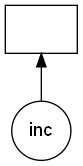

In [21]:
inc_output.visualize()

In [22]:
inc_output.compute()

4

In [26]:
lazy_eval_double=delayed(double)
lazy_eval_double

Delayed('double-64b76ee9-70fd-4e7a-b682-7df5d64b0d86')

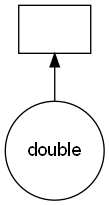

In [28]:
db_out=lazy_eval_double(3)
db_out.visualize()

In [29]:
db_out.compute()

6

In [30]:
db=lazy_eval_double(inc_output)
db

Delayed('double-e37fbed5-f45c-4198-a238-7ca634cf7e88')

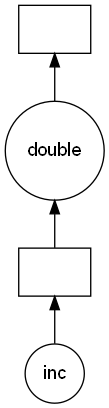

In [31]:
db.visualize()

In [32]:
db.compute()

8

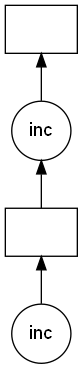

In [33]:
inc=lazy_eval_inc(inc_output)
inc.visualize()

In [34]:
inc.compute()

5

In [35]:
@delayed ##object task graph to compute 
def inc(x):
    time.sleep(0.5)
    return x+1
@delayed
def double(x):
    time.sleep(0.5)
    return 2*x
@delayed
def add(x,y):
    time.sleep(0.5)
    return x+y

In [41]:
%%time
data=[1,2,3,4]
output=[]
for x in data:
    a=inc(x)
    b=double(x)
    c=add(a,b)
    output.append(c)
total=delayed(sum)(output)##all delayed create delayed obj sum compose of other delayed inc .... to compute later
total

CPU times: total: 0 ns
Wall time: 999 µs


Delayed('sum-fc2e991f-b525-4acc-af53-a46d775e6481')

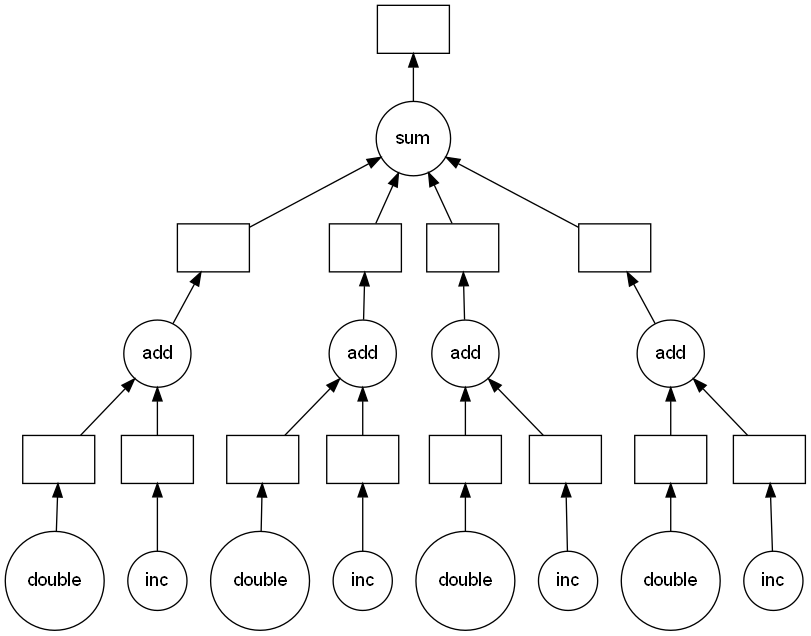

In [42]:
total.visualize()##all delayed create delayed obj sum compose of other delayed inc .... to compute later

In [43]:
%%time
total.compute()##time is decrease with 0.5

CPU times: total: 93.8 ms
Wall time: 3.03 s


34

## Futures 

In [44]:
##async computution ,submit with function and args  will send to shcedular ,it 
#will return future obj refer to to data on cluster ,the diffrence with 
#lazy that the futures execute when results are present from other futures
#and the result of future returned immediately  when you call .results() not lazy : eager
#all this process are in rmote cluster
import random 
def inc(x):
    time.sleep(random.uniform(0,2))
    return x+1

In [45]:
f=client.submit(inc,7.2) #submit inc to distributed schedular 
print(f)
print(type(f))

<Future: pending, key: inc-f04454096dd15d55972256616b597a1b>
<class 'distributed.client.Future'>


In [46]:
print(f) ##return future with status finish ready to gather result

<Future: finished, type: float, key: inc-f04454096dd15d55972256616b597a1b>


In [47]:
f.result()

8.2

In [48]:
del f

In [49]:
data=range(10)
futures=client.map(inc,data)
futures

[<Future: pending, key: inc-1a361ec2ddda0a762685bc49f0117f35>,
 <Future: pending, key: inc-d4e10b4b2961c695a08174a7c7aa6d62>,
 <Future: pending, key: inc-274ee60c24ecdf31d7d28b8a17042faf>,
 <Future: pending, key: inc-e0abc894cec406024096618acce5b483>,
 <Future: pending, key: inc-2b2f01e38690d0fa2d8ea0200d535b0a>,
 <Future: pending, key: inc-9477431c0047dd5d9f23c55e6e342006>,
 <Future: pending, key: inc-57823fb4888406377bf623f67afccd3b>,
 <Future: pending, key: inc-14ea43b2fafa5408be9564fd1524d098>,
 <Future: pending, key: inc-d67df6c312b1e3c6edab1c037aee6f91>,
 <Future: pending, key: inc-a52e983b2041a21890330f43ae7ffa83>]

In [51]:
futures

[<Future: finished, type: int, key: inc-1a361ec2ddda0a762685bc49f0117f35>,
 <Future: finished, type: int, key: inc-d4e10b4b2961c695a08174a7c7aa6d62>,
 <Future: finished, type: int, key: inc-274ee60c24ecdf31d7d28b8a17042faf>,
 <Future: finished, type: int, key: inc-e0abc894cec406024096618acce5b483>,
 <Future: finished, type: int, key: inc-2b2f01e38690d0fa2d8ea0200d535b0a>,
 <Future: finished, type: int, key: inc-9477431c0047dd5d9f23c55e6e342006>,
 <Future: finished, type: int, key: inc-57823fb4888406377bf623f67afccd3b>,
 <Future: finished, type: int, key: inc-14ea43b2fafa5408be9564fd1524d098>,
 <Future: finished, type: int, key: inc-d67df6c312b1e3c6edab1c037aee6f91>,
 <Future: finished, type: int, key: inc-a52e983b2041a21890330f43ae7ffa83>]

In [50]:
results=client.gather(futures)##[f.results() for f in futures]
results

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [52]:
client.close()

## Distributed

In [58]:
##local cluster with all core 
from dask.distributed import LocalCluster,Client
cluster=LocalCluster(n_workers=2 ,threads_per_worker=1)
cluster

C:\Users\alish\anaconda3\envs\dask-tutorial\lib\site-packages\distributed\node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 62984 instead
  warnings.warn(


In [60]:
cluster.get_logs()

{'Cluster': '',
 'Scheduler': "2022-09-10 19:29:39,560 - distributed.scheduler - INFO - State start\n2022-09-10 19:29:39,583 - distributed.scheduler - INFO -   Scheduler at:     tcp://127.0.0.1:62985\n2022-09-10 19:29:39,584 - distributed.scheduler - INFO -   dashboard at:           127.0.0.1:62984\n2022-09-10 19:29:41,300 - distributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:63008', name: 0, status: running, memory: 0, processing: 0>\n2022-09-10 19:29:41,301 - distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:63008\n2022-09-10 19:29:41,396 - distributed.scheduler - INFO - Register worker <WorkerState 'tcp://127.0.0.1:63011', name: 1, status: running, memory: 0, processing: 0>\n2022-09-10 19:29:41,397 - distributed.scheduler - INFO - Starting worker compute stream, tcp://127.0.0.1:63011\n2022-09-10 19:29:47,822 - distributed.scheduler - INFO - Receive client connection: Client-8cc1cc75-3136-11ed-86c0-005056c00008",
 'tcp://127.0.0.1:63008': '2022-09-10 19:29:40,766 - distributed.worker - INFO -       Start worker at:      tcp://127.0.0.1:63008\n2022-09-10 19:29:40,766 - distributed.worker - INFO -          Listening to:      tcp://127.0.0.1:63008\n2022-09-10 19:29:40,767 - distributed.worker - INFO -           Worker name:                          0\n2022-09-10 19:29:40,767 - distributed.worker - INFO -          dashboard at:            127.0.0.1:63009\n2022-09-10 19:29:40,767 - distributed.worker - INFO - Waiting to connect to:      tcp://127.0.0.1:62985\n2022-09-10 19:29:40,767 - distributed.worker - INFO - -------------------------------------------------\n2022-09-10 19:29:40,767 - distributed.worker - INFO -               Threads:                          1\n2022-09-10 19:29:40,767 - distributed.worker - INFO -                Memory:                   7.71 GiB\n2022-09-10 19:29:40,767 - distributed.worker - INFO -       Local Directory: C:\\Users\\alish\\AppData\\Local\\Temp\\dask-worker-space\\worker-gyvp00za\n2022-09-10 19:29:40,767 - distributed.worker - INFO - -------------------------------------------------\n2022-09-10 19:29:41,301 - distributed.worker - INFO -         Registered to:      tcp://127.0.0.1:62985\n2022-09-10 19:29:41,301 - distributed.worker - INFO - -------------------------------------------------',
 'tcp://127.0.0.1:63011': '2022-09-10 19:29:40,897 - distributed.worker - INFO -       Start worker at:      tcp://127.0.0.1:63011\n2022-09-10 19:29:40,897 - distributed.worker - INFO -          Listening to:      tcp://127.0.0.1:63011\n2022-09-10 19:29:40,897 - distributed.worker - INFO -           Worker name:                          1\n2022-09-10 19:29:40,897 - distributed.worker - INFO -          dashboard at:            127.0.0.1:63012\n2022-09-10 19:29:40,897 - distributed.worker - INFO - Waiting to connect to:      tcp://127.0.0.1:62985\n2022-09-10 19:29:40,897 - distributed.worker - INFO - -------------------------------------------------\n2022-09-10 19:29:40,897 - distributed.worker - INFO -               Threads:                          1\n2022-09-10 19:29:40,897 - distributed.worker - INFO -                Memory:                   7.71 GiB\n2022-09-10 19:29:40,897 - distributed.worker - INFO -       Local Directory: C:\\Users\\alish\\AppData\\Local\\Temp\\dask-worker-space\\worker-jh7_xocl\n2022-09-10 19:29:40,897 - distributed.worker - INFO - -------------------------------------------------\n2022-09-10 19:29:41,397 - distributed.worker - INFO -         Registered to:      tcp://127.0.0.1:62985\n2022-09-10 19:29:41,397 - distributed.worker - INFO - -------------------------------------------------'}

In [61]:
cluster.dashboard_link

'http://127.0.0.1:62984/status'

In [59]:
client=Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:62984/status,
Dashboard: http://127.0.0.1:62984/status,Workers: 2
Total threads: 2,Total memory: 15.42 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:62985,Workers: 2
Dashboard: http://127.0.0.1:62984/status,Total threads: 2
Started: Just now,Total memory: 15.42 GiB
Comm: tcp://127.0.0.1:63008,Total threads: 1
Dashboard: http://127.0.0.1:63009/status,Memory: 7.71 GiB
Nanny: tcp://127.0.0.1:62988,


In [62]:
del client,cluster

In [ ]:
##remote ssh cluster -->create cluster identifying name host or p address

In [63]:
from dask.distributed import SSHCluster

In [65]:
# cluster=SSHCluster(['localhost','host1','host2'])
# cluster

In [ ]:
##scale -->cluster.scale(n) add more worker 